
### 타이타닉 데이타 셋


  * **Survival** - 생존 여부. 0이면 사망, 1이면 생존한 것으로 간주합니다.
  * **Pclass** - 티켓 등급. 1등석(1), 2등석(2), 3등석(3)이 있으며, 1등석일수록 좋고 3등석일수록 좋지 않습니다.
  * **Sex** - 성별. 남자(male)와 여자(female)이 있습니다.
  * **Age** - 나이입니다. 틈틈히 빈 값이 존재하며, 소수점 값도 존재합니다.
  * **SibSp** - 해당 승객과 같이 탑승한 형재/자매(siblings)와 배우자(spouses)의 총 인원 수입니다.
  * **Parch** - 해당 승객과 같이 탑승한 부모(parents)와 자식(children)의 총 인원 수입니다.
  * **Ticket** - 티켓 번호입니다. 다양한 텍스트(문자열)로 구성되어 있습니다.
  * **Fare** - 운임 요금입니다. 소수점으로 구성되어 있습니다.
  * **Cabin** - 객실 번호입니다. 많은 빈 값이 존재하며, 다양한 텍스트(문자열)로 구성되어 있습니다.
  * **Embarked** - 선착장입니다. C는 셰르부르(Cherbourg)라는 프랑스 지역, Q는 퀸스타운(Queenstown)이라는 영국 지역, S는 사우스햄튼(Southampton)이라는 영국 지역입니다.

In [1]:
import pandas as pd

titanic = pd.read_csv('data/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# (1) 1등실 승객중 나이가 10세 미만인 승객

titanic[(titanic['Pclass']==1)&(titanic['Age']<10)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
445,446,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S


In [29]:
# (2) 선실 등급별 승객의 수
#titanic.info()
titanic.groupby('Pclass',as_index=False).count()[['PassengerId','Pclass']]

,PassengerId,Pclass
0,216,1
1,184,2
2,491,3


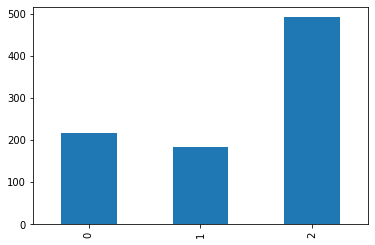

In [32]:
# 그래프로 표현
titanic.groupby('Pclass',as_index=False).count()['PassengerId'].plot(kind='bar')

Pclass  Survived
1       1           62.962963
2       1           47.282609
3       1           24.236253
Name: PassengerId, dtype: float64

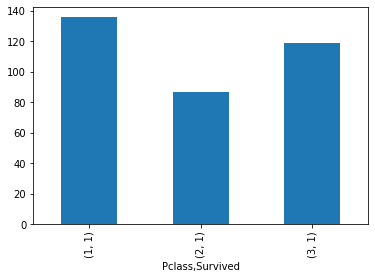

In [77]:
# (3) 선실 등급별 생존자 수
#titanic.groupby(['Pclass','Survived']).count().plot(kind='bar')
temp6 = titanic.groupby(['Pclass','Survived']).count()
temp6['PassengerId'].loc[1:,1].plot(kind='bar')
temp6['PassengerId']
temp7 = (temp6['PassengerId'].loc[1:,1]/titanic.groupby(['Pclass']).count()['PassengerId'])*100
temp7


In [75]:
"""
    groupby().agg()

    DataFrame의 groupby()는 SQL의 group by 보다 유연성이 떨어질 수 밖에 없다
    그래도 DataFrame의 groupby()에서 여러 개의 컬럼에 각각 다른 집계 함수를 사용할 때 agg() 함수 이용
"""

#  선실등급별 가장 많은 나이값, 평균요금 구하고자 한다면??
titanic.groupby('Pclass').agg({'Age':'max','SibSp':'sum','Fare':'mean'})



,Age,SibSp,Fare
Pclass,,,
1,80.0,90,84.154687
2,70.0,74,20.662183
3,74.0,302,13.675550


In [87]:
# 나이에 따라 15미만은 Chlid, 15이상 60세 미만은 'Adult' 그 이상은 Elderly로 구분하려면

def get_age_cate(age):
    cat = ''
    if age < 15: cat = 'Child'
    elif age < 60 : cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

titanic['Age_cate'] = titanic['Age'].apply(get_age_cate)
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cate
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,Elderly
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,Elderly
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,Elderly
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,Elderly
170,171,0,1,"Van der hoef, Mr. Wyckoff",male,61.0,0,0,111240,33.5000,B19,S,Elderly
252,253,0,1,"Stead, Mr. William Thomas",male,62.0,0,0,113514,26.5500,C87,S,Elderly
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,Elderly
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q,Elderly
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S,Elderly
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S,Elderly
